In [1]:
from src.utils.input import *
%run "docs\src\utils\notebook_style.ipynb"

# Zuggurtmodell

## Verbundschubspannungs-Schlupfbeziehung

Die Verbundschuspannungs-Schlupfbeziehung wird in @Spathelf2022 foglendermassen postuliert:
Es wird hier auf die Stahlspannung sich bezogen, nicht auf den Schlupf

In [2]:
sigma_s, f_cc, f_sy, f_ct = sp.symbols('sigma_s f_cc f_sy f_ct')
tau_b = sp.Function('tau_b')(sigma_s)
delta_sigma = sp.Function('delta')

In [3]:
eq_tau_b = sp.Eq(tau_b,sp.Piecewise((0, sigma_s<=0),(0.6*f_cc **(sp.Rational(2,3)), sigma_s<=f_sy), (0.3*f_cc**(sp.Rational(2,3)), sigma_s >f_sy)))
eq_tau_b_lambd = sp.lambdify((sigma_s, f_sy, f_cc), eq_tau_b.rhs)


sp.latex(eq_tau_b)

'\\tau_{b}{\\left(\\sigma_{s} \\right)} = \\begin{cases} 0 & \\text{for}\\: \\sigma_{s} \\leq 0 \\\\0.6 f_{cc}^{\\frac{2}{3}} & \\text{for}\\: f_{sy} \\geq \\sigma_{s} \\\\0.3 f_{cc}^{\\frac{2}{3}} & \\text{otherwise} \\end{cases}'

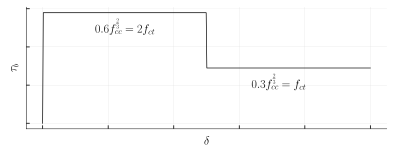

In [4]:
#| label: fig-zg-verbundschubbez
#| fig-cap: Verbundschubspannung als Funktion der Betonstahlspannung

f_sy_num = 500

sigma_s_array = np.linspace(0,f_sy_num*2,500)
tau_b_array = eq_tau_b_lambd(sigma_s_array, f_sy_num, 30)

plt.plot(sigma_s_array, tau_b_array, color='black')
plt.xlabel(f'${sp.latex(delta_sigma)}$')
plt.ylabel(f'$\\tau_b$')

plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])

plt.annotate(f'${sp.latex(sp.Eq(0.6*f_cc **(sp.Rational(2,3)),2 *f_ct))}$',xy=(sigma_s_array[int(len(sigma_s_array)/4)], tau_b_array[int(len(tau_b_array)/4)]), xytext=(-30, -20), textcoords='offset pixels')

plt.annotate(f'${sp.latex(sp.Eq(0.3*f_cc**(sp.Rational(2,3)), f_ct))}$',xy=(sigma_s_array[int(len(sigma_s_array)/1.5)], tau_b_array[int(len(tau_b_array)/1.5)]), xytext=(-10, -20), textcoords='offset pixels')



plt.savefig('images/verbund_schlupf.svg')
plt.show()
